In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

# Styling
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

# Create plots directory if it doesn't exist
os.makedirs('../plots', exist_ok=True)

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


In [4]:
data = pd.read_csv("../data/train.csv")

print(f"Dataset Shape: {data.shape}")
print(f"Total Passengers: {len(data)}")
print(f"\nFirst 5 rows:")
data.head()



Dataset Shape: (891, 12)
Total Passengers: 891

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Basic info
print("="*60)
print("DATASET INFORMATION")
print("="*60)
data.info()

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
data.describe()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

STATISTICAL SUMMARY


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


MISSING VALUES ANALYSIS
      Column  Missing Count  Percentage
10     Cabin            687   77.104377
5        Age            177   19.865320
11  Embarked              2    0.224467


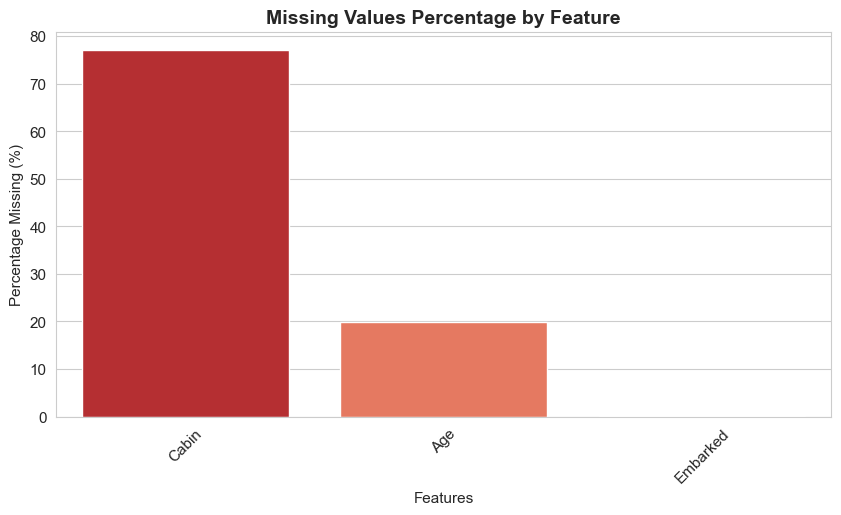

In [6]:
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing = data.isnull().sum()
missing_pct = (missing / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 5))
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]
sns.barplot(x='Column', y='Percentage', data=missing_df_filtered, palette='Reds_r')
plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
plt.ylabel('Percentage Missing (%)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.savefig('../plots/missing_values.png', bbox_inches='tight', dpi=300)
plt.show()



SURVIVAL DISTRIBUTION
Did not survive: 549 (61.6%)
Survived: 342 (38.4%)


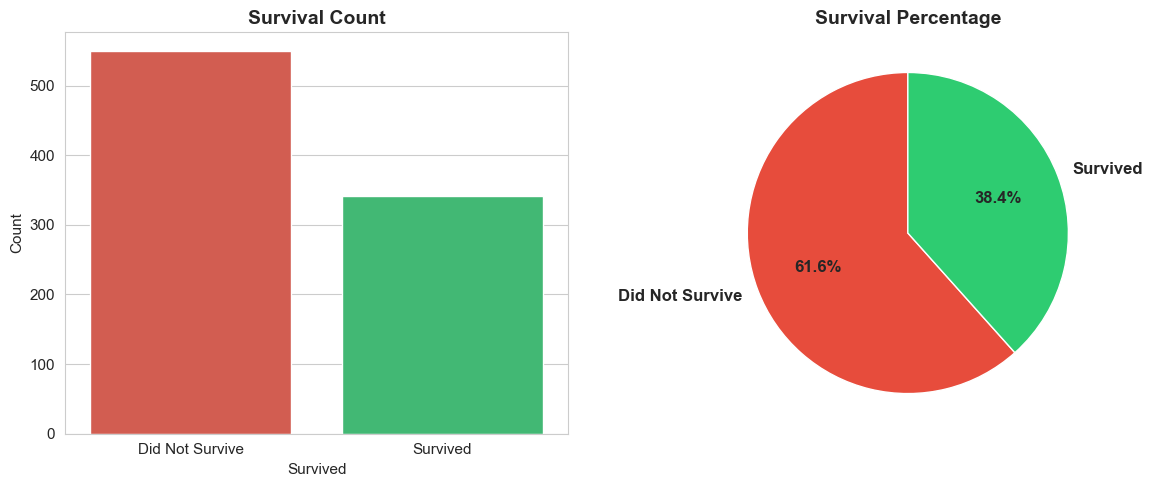

In [7]:
# Survival distribution
survival_counts = data['Survived'].value_counts()
survival_pct = data['Survived'].value_counts(normalize=True) * 100

print("="*60)
print("SURVIVAL DISTRIBUTION")
print("="*60)
print(f"Did not survive: {survival_counts[0]} ({survival_pct[0]:.1f}%)")
print(f"Survived: {survival_counts[1]} ({survival_pct[1]:.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
sns.countplot(x='Survived', data=data, palette=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(survival_counts, labels=['Did Not Survive', 'Survived'], 
            autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'], 
            startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[1].set_title('Survival Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/survival_overview.png', bbox_inches='tight', dpi=300)
plt.show()



In [8]:
# Fill missing values to enable visualization
data_clean = data.copy()
data_clean['Age'] = data_clean['Age'].fillna(data_clean['Age'].median())
data_clean['Embarked'] = data_clean['Embarked'].fillna(data_clean['Embarked'].mode()[0])
data_clean['Fare'] = data_clean['Fare'].fillna(data_clean['Fare'].median())

print("✅ Missing values filled for EDA")
print(f"Remaining missing values:\n{data_clean.isnull().sum().sum()}")

✅ Missing values filled for EDA
Remaining missing values:
687


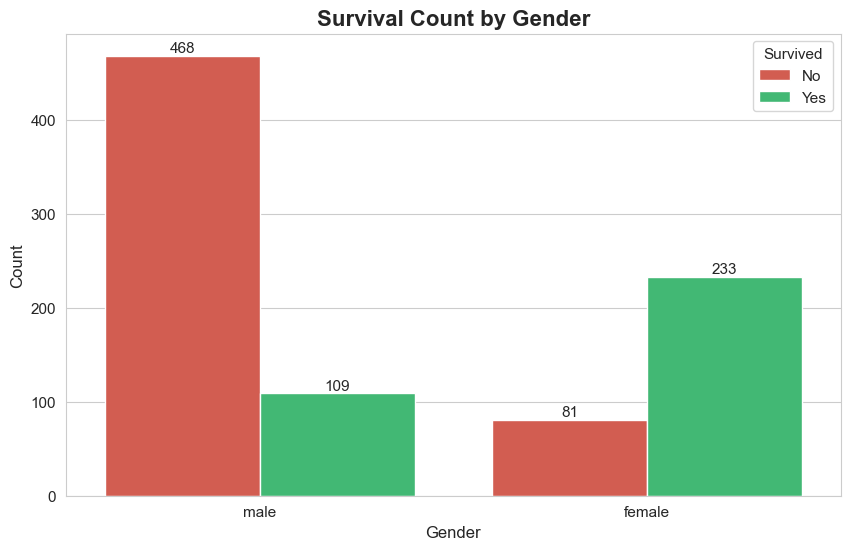

Survival Rate by Gender:
        sum  count      mean
Sex                         
female  233    314  0.742038
male    109    577  0.188908


In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=data_clean, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Count by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

# Add percentage annotations
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.savefig('../plots/survival_by_sex.png', bbox_inches='tight', dpi=300)
plt.show()

# Statistics
print("Survival Rate by Gender:")
print(data_clean.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean']))



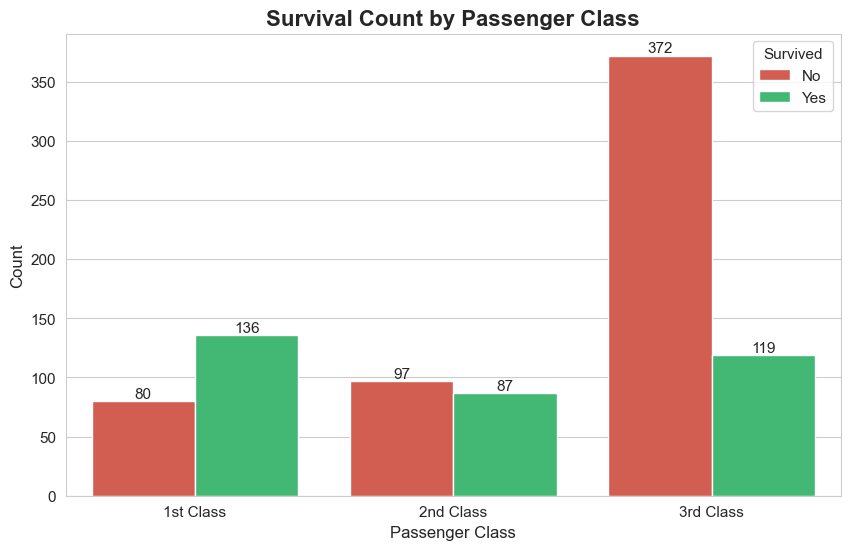

Survival Rate by Passenger Class:
        sum  count      mean
Pclass                      
1       136    216  0.629630
2        87    184  0.472826
3       119    491  0.242363


In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data_clean, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Count by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.savefig('../plots/survival_by_pclass.png', bbox_inches='tight', dpi=300)
plt.show()

# Statistics
print("Survival Rate by Passenger Class:")
print(data_clean.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean']))


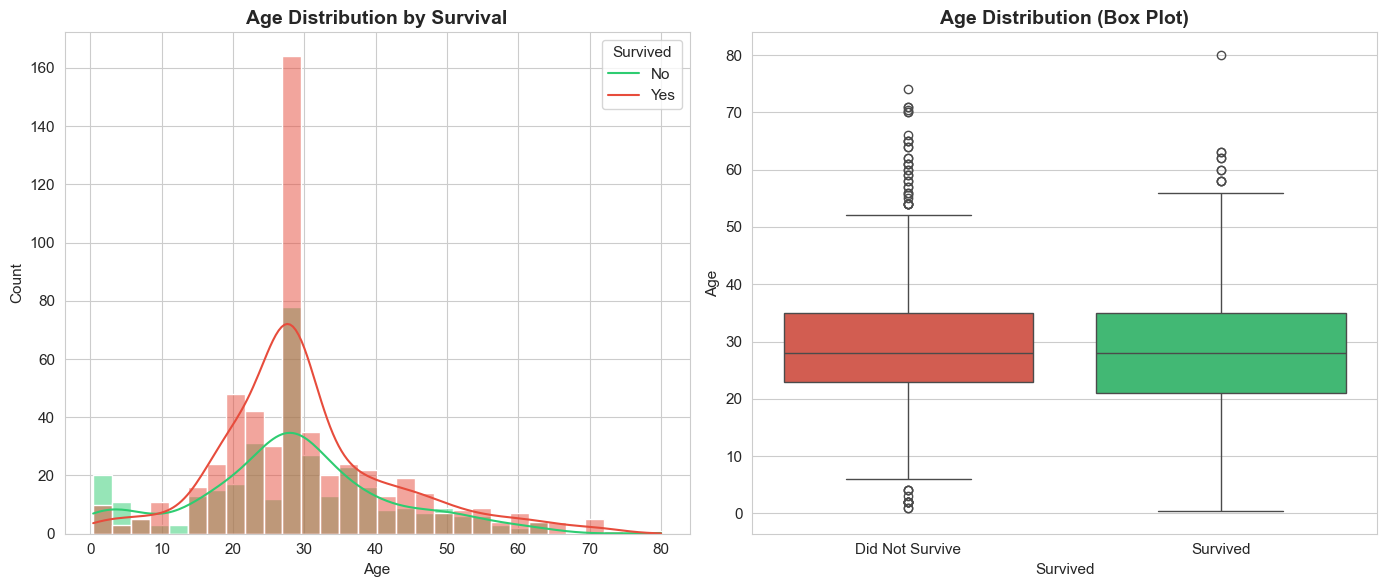

Age Statistics by Survival:
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         549.0  30.028233  12.499986  1.00  23.0  28.0  35.0  74.0
1         342.0  28.291433  13.764425  0.42  21.0  28.0  35.0  80.0


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(data=data_clean, x='Age', bins=30, hue='Survived', 
             kde=True, palette=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Box plot
sns.boxplot(x='Survived', y='Age', data=data_clean, palette=['#e74c3c', '#2ecc71'], ax=axes[1])
axes[1].set_title('Age Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.savefig('../plots/age_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

print("Age Statistics by Survival:")
print(data_clean.groupby('Survived')['Age'].describe())



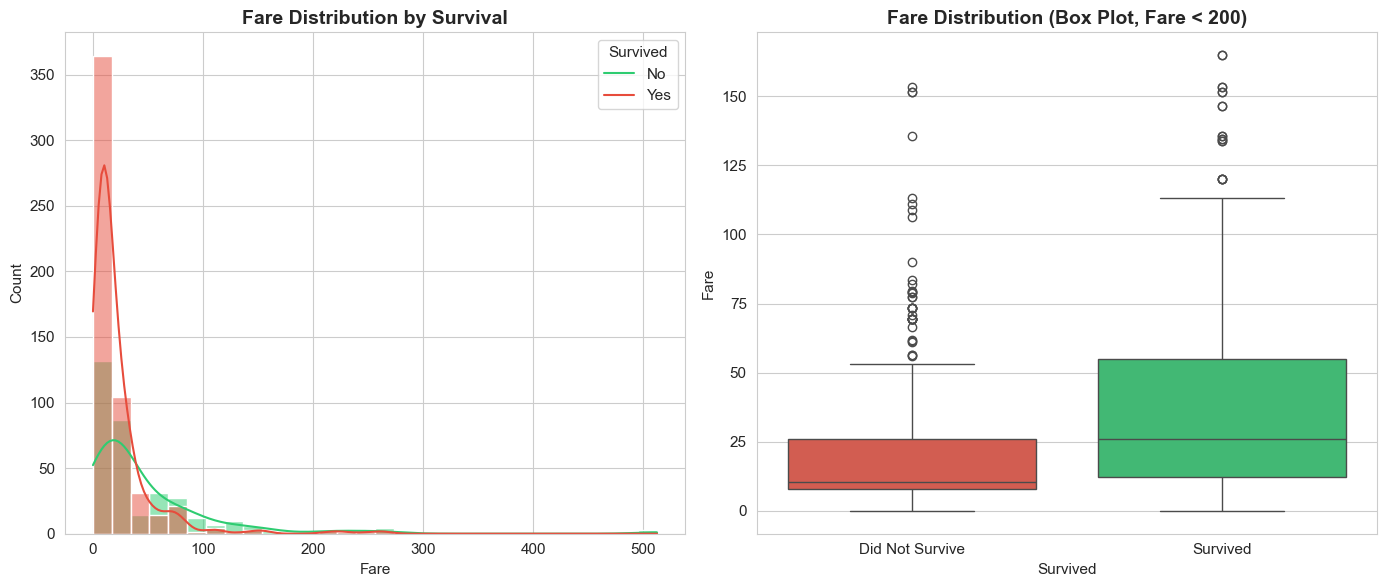

Fare Statistics by Survival:
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram (log scale for better visualization)
sns.histplot(data=data_clean, x='Fare', bins=30, hue='Survived', 
             kde=True, palette=['#e74c3c', '#2ecc71'], ax=axes[0])
axes[0].set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Box plot (with outliers removed for clarity)
sns.boxplot(x='Survived', y='Fare', data=data_clean[data_clean['Fare'] < 200], 
            palette=['#e74c3c', '#2ecc71'], ax=axes[1])
axes[1].set_title('Fare Distribution (Box Plot, Fare < 200)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.savefig('../plots/fare_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

print("Fare Statistics by Survival:")
print(data_clean.groupby('Survived')['Fare'].describe())



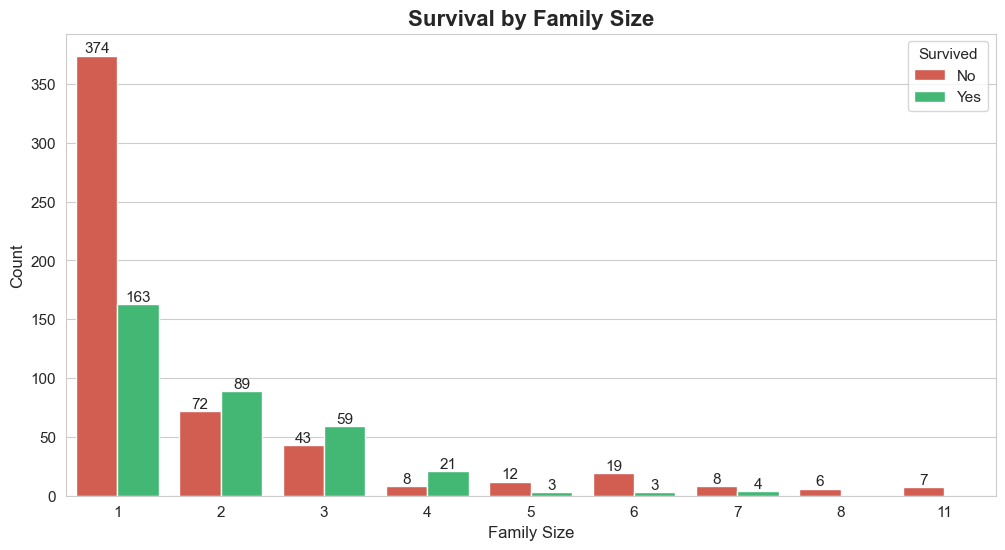

Survival Rate by Family Size:
            sum  count   mean
FamilySize                   
1           163    537  0.304
2            89    161  0.553
3            59    102  0.578
4            21     29  0.724
5             3     15  0.200
6             3     22  0.136
7             4     12  0.333
8             0      6  0.000
11            0      7  0.000


In [13]:
# Create FamilySize feature
data_clean['FamilySize'] = data_clean['SibSp'] + data_clean['Parch'] + 1

plt.figure(figsize=(12, 6))
sns.countplot(x='FamilySize', hue='Survived', data=data_clean, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival by Family Size', fontsize=16, fontweight='bold')
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.savefig('../plots/family_size.png', bbox_inches='tight', dpi=300)
plt.show()

print("Survival Rate by Family Size:")
print(data_clean.groupby('FamilySize')['Survived'].agg(['sum', 'count', 'mean']).round(3))


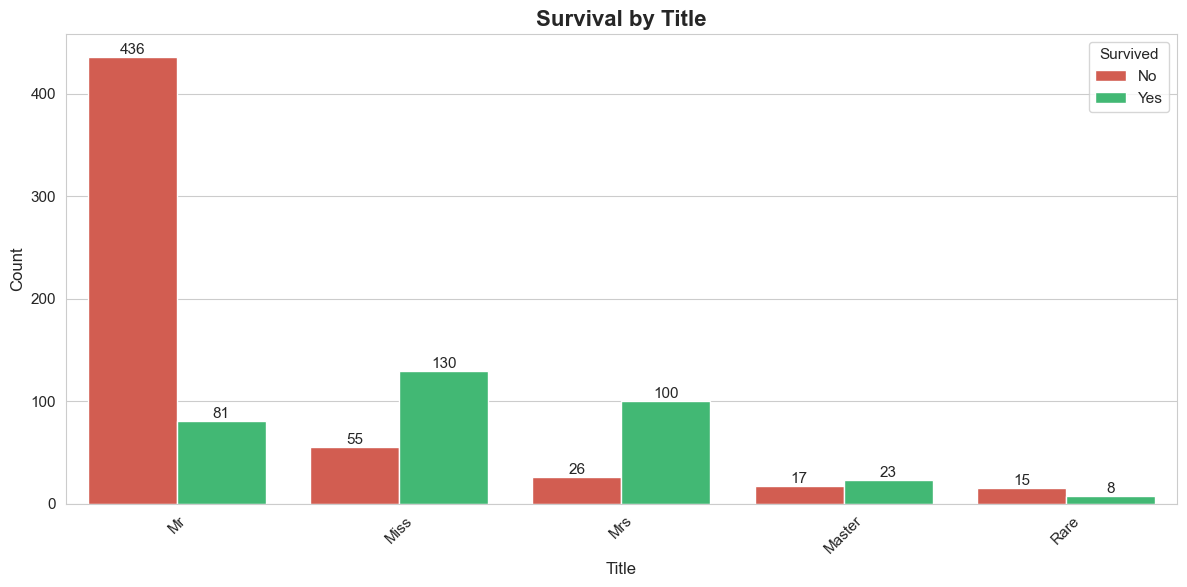

Survival Rate by Title:
        sum  count   mean
Title                    
Master   23     40  0.575
Miss    130    185  0.703
Mr       81    517  0.157
Mrs     100    126  0.794
Rare      8     23  0.348


In [14]:
# Extract Title from Name
data_clean['Title'] = data_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
data_clean['Title'] = data_clean['Title'].replace(['Mlle', 'Ms'], 'Miss')
data_clean['Title'] = data_clean['Title'].replace('Mme', 'Mrs')
data_clean['Title'] = data_clean['Title'].replace(
    ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Sir', 'Don', 'Jonkheer'], 'Rare'
)
data_clean['Title'] = data_clean['Title'].replace(['Lady', 'Countess', 'Dona'], 'Rare')

plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=data_clean, 
              palette=['#e74c3c', '#2ecc71'], order=data_clean['Title'].value_counts().index)
plt.title('Survival by Title', fontsize=16, fontweight='bold')
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.tight_layout()
plt.savefig('../plots/survival_by_title.png', bbox_inches='tight', dpi=300)
plt.show()

print("Survival Rate by Title:")
print(data_clean.groupby('Title')['Survived'].agg(['sum', 'count', 'mean']).round(3))



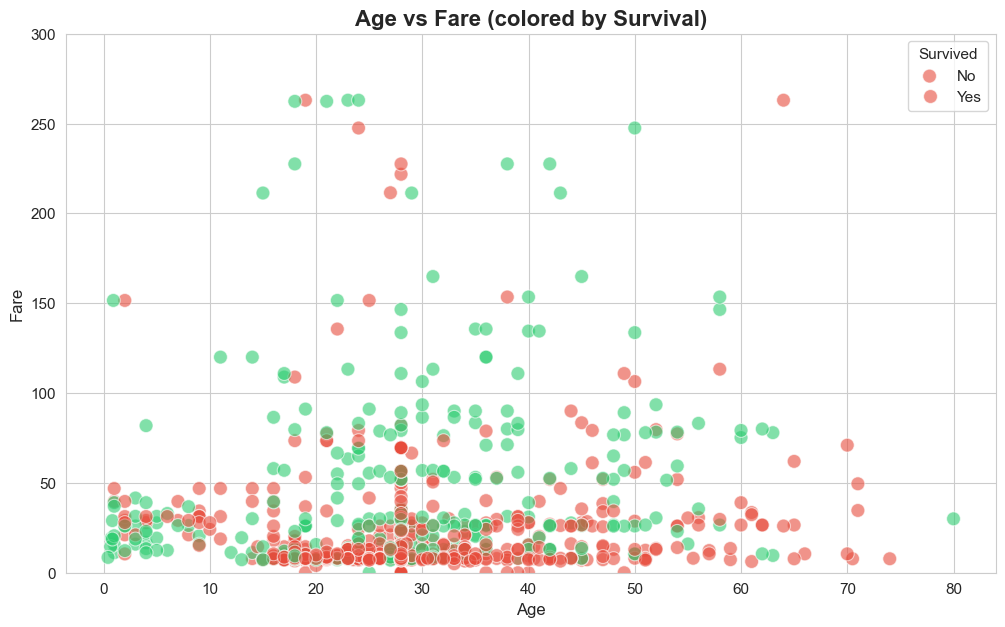

In [15]:
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data_clean, 
                          palette=['#e74c3c', '#2ecc71'], s=100, alpha=0.6)
plt.title('Age vs Fare (colored by Survival)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.ylim(0, 300)  # Limit y-axis for better visualization

plt.savefig('../plots/age_vs_fare.png', bbox_inches='tight', dpi=300)
plt.show()



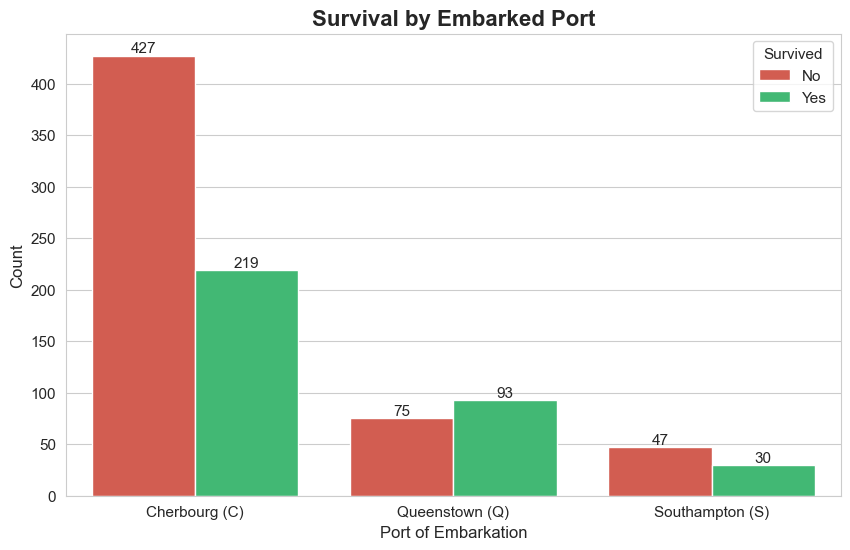

Survival Rate by Embarked Port:
          sum  count   mean
Embarked                   
C          93    168  0.554
Q          30     77  0.390
S         219    646  0.339


In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data_clean, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival by Embarked Port', fontsize=16, fontweight='bold')
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks([0, 1, 2], ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d')

plt.savefig('../plots/survival_by_embarked.png', bbox_inches='tight', dpi=300)
plt.show()

print("Survival Rate by Embarked Port:")
print(data_clean.groupby('Embarked')['Survived'].agg(['sum', 'count', 'mean']).round(3))

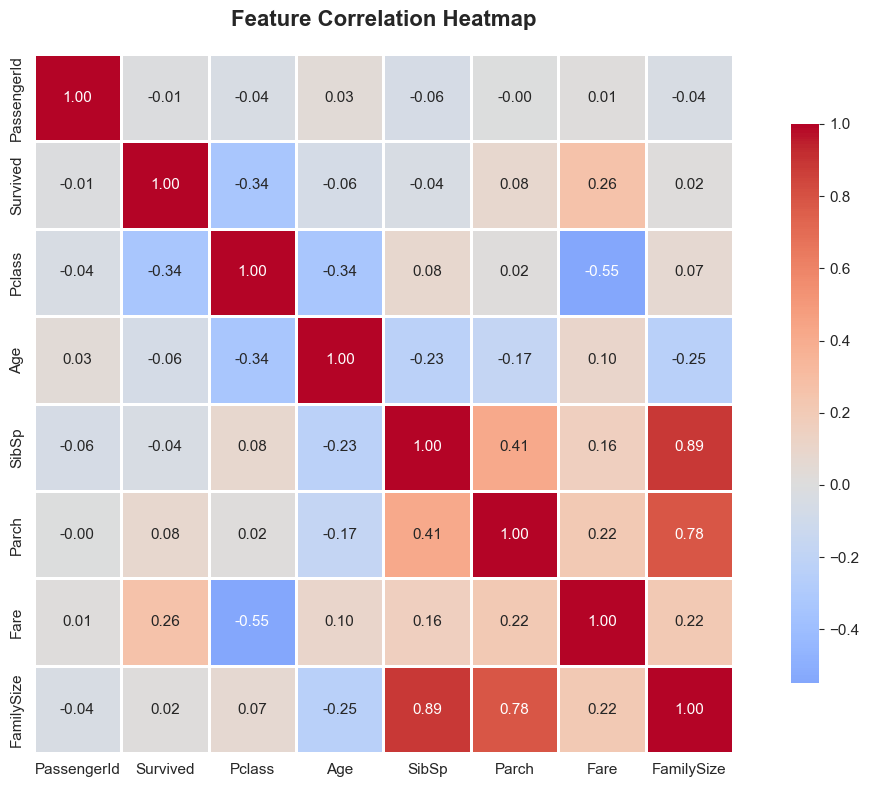

In [17]:
# Select numeric columns only
numeric_data = data_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../plots/correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()


In [18]:
print("="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

# Overall survival rate
survival_rate = data_clean['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.1f}%\n")

# Gender insights
gender_survival = data_clean.groupby('Sex')['Survived'].mean() * 100
print("Survival Rate by Gender:")
for gender, rate in gender_survival.items():
    print(f"  {gender.capitalize()}: {rate:.1f}%")

# Class insights
print("\nSurvival Rate by Class:")
class_survival = data_clean.groupby('Pclass')['Survived'].mean() * 100
for pclass, rate in class_survival.items():
    print(f"  Class {pclass}: {rate:.1f}%")

# Age insights
print(f"\nAverage Age of Survivors: {data_clean[data_clean['Survived']==1]['Age'].mean():.1f} years")
print(f"Average Age of Non-Survivors: {data_clean[data_clean['Survived']==0]['Age'].mean():.1f} years")

print("\n" + "="*60)
print("✅ EDA COMPLETE - All plots saved to ../plots/")
print("="*60)


KEY INSIGHTS FROM EDA
Overall Survival Rate: 38.4%

Survival Rate by Gender:
  Female: 74.2%
  Male: 18.9%

Survival Rate by Class:
  Class 1: 63.0%
  Class 2: 47.3%
  Class 3: 24.2%

Average Age of Survivors: 28.3 years
Average Age of Non-Survivors: 30.0 years

✅ EDA COMPLETE - All plots saved to ../plots/
